In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import itertools
import os
import scipy

In [4]:
# Import .csv as dataframe
df = pd.read_csv("/content/toy_data.csv")

In [7]:
df.head()

,Unnamed: 0,N,adj,terms,p,mixer,nit,runtime,success,x_descent,f_descent,jac_descent,f_samples,jac_samples,sigma_p,approx,sv
0,0,8,"{0: [2, 4, 6], 1: [2, 6], 2: [0, 1, 6, 7], 3: ...","[(-1, (0,)), (-1, (1,)), (-1, (2,)), (-1, (3,)...",1,x,11,3.079673,True,"[array([-1.01, 1. ]), array([-1.02990234, 0...","[-2.155638450109795, -2.389090411529767, -3.43...","[array([-0.73099528, 2.07837948]), array([-1....","[(array([4.6687181 , 3.71753092]), -1.83208413...","[(array([4.6687181 , 3.71753092]), array([ 0.2...","[0.012364315388194966, 0.01526232185756661, 0....",0.495405,[ 0.00310065-0.00109952j 0.01742874+0.0130642...
1,1,8,"{0: [1, 6, 7], 1: [0, 3, 6], 2: [3, 4, 6], 3: ...","[(-1, (0,)), (-1, (1,)), (-1, (2,)), (-1, (3,)...",1,x,10,2.079407,True,"[array([-1.01, 1. ]), array([-0.99416061, 1...","[1.400310951551188, 1.2623676032234834, 1.0300...","[array([-4.93926206, -1.32603181]), array([-4....","[(array([1.36923039, 1.25908261]), 2.955017413...","[(array([1.36923039, 1.25908261]), array([-4.0...","[0.008328117249735239, 0.009094690511553748, 0...",0.415251,[ 3.74825908e-03+2.22200426e-03j 1.68585424e-...
2,2,8,"{0: [1, 2, 5, 7], 1: [0], 2: [0], 3: [4, 6], 4...","[(-1, (0,)), (-1, (1,)), (-1, (2,)), (-1, (3,)...",1,x,10,1.221513,True,"[array([-0.32811408, 1. ]), array([-0....","[-1.2733256218073186, -3.336408965271634, -3.5...","[array([-0.87125204, 7.0604263 ]), array([-5....","[(array([0.53128135, 2.75727674]), -4.18247727...","[(array([0.53128135, 2.75727674]), array([4.01...","[0.004698260037139447, 0.04059627584272053, 0....",0.460304,[-2.25803186e-03-0.0029546j 1.98351366e-02+0...
3,3,8,"{0: [2], 1: [5], 2: [0, 5], 3: [7], 4: [6, 7],...","[(-1, (0,)), (-1, (1,)), (-1, (2,)), (-1, (3,)...",1,x,9,1.132287,True,"[array([-0.36449842, 1. ]), array([-0....","[-0.7933543261009708, -2.823508450500533, -3.6...","[array([-1.07427641, 6.63855035]), array([-8....","[(array([5.21447675, 3.36073405]), -0.13050392...","[(array([5.21447675, 3.36073405]), array([ 2.1...","[0.012577170409449223, 0.12414981469613239, 0....",0.512046,[ 0.00124276+1.41914667e-03j -0.00118174+5.244...
4,4,8,"{0: [3, 6], 1: [5], 2: [5], 3: [0, 5], 4: [7],...","[(-1, (0,)), (-1, (1,)), (-1, (2,)), (-1, (3,)...",1,x,10,1.718494,True,"[array([-0.18435063, 1. ]), array([-1....","[-1.2026109353993533, -2.5904350470806596, -4....","[array([0.15523202, 4.13689509]), array([-2.20...","[(array([1.03068078, 2.12937517]), 0.125479340...","[(array([1.03068078, 2.12937517]), array([ 0.6...","[0.0021906942917512516, 0.03087123889985922, 0...",0.501468,[-7.83349697e-04-5.93150316e-03j 1.31244073e-...


In [10]:
df.columns

Index(['Unnamed: 0', 'N', 'adj', 'terms', 'p', 'mixer', 'nit', 'runtime',
       'success', 'x_descent', 'f_descent', 'jac_descent', 'f_samples',
       'jac_samples', 'sigma_p', 'approx', 'sv'],
      dtype='object')

In [26]:
df.head()

,N,p,runtime,success,approx,Graph
0,8,1,3.079673,True,0.495405,0
1,8,1,2.079407,True,0.415251,1
2,8,1,1.221513,True,0.460304,2
3,8,1,1.132287,True,0.512046,3
4,8,1,1.718494,True,0.501468,4


In [25]:
# Data cleaning
df = df[['N', 'p', 'runtime', 'success', 'approx']]
df["Graph"] = df.index
df_x = df.drop('runtime', axis=1)
df_y = df['runtime']

In [29]:
# Split df into training, testing, (& validation) dataset (ratio of 70:30)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=.3)
# test_x, val_x, test_y, val_y = train_test_split(test_x, test_y, test_size=.5)

In [61]:
# Set list of predictors
predictors = ['N', 'p']

In [67]:
# Fit linear regression model
from sklearn import linear_model

linear_regression_model = linear_model.LinearRegression()
obj = linear_regression_model.fit(train_x[predictors], train_y)
linear_regression_predictions = linear_regression_model.predict(test_x[predictors])

# print("Accuracy on test data: {:.3f}".format(linear_regression_model.score(test_x[predictors], test_y)))

In [68]:
# Compute accuracy of linear regression model: RMSE, MAE, R^2, & Adj. R^2
rmse = np.sqrt(np.mean((linear_regression_predictions - test_y) ** 2))
mae = np.mean(np.abs(linear_regression_predictions - test_y))
r_2 = 1 - (np.sum((test_y - linear_regression_predictions) ** 2) / np.sum((test_y - np.mean(test_y)) ** 2))
n = len(train_x)
p = len(predictors)
adj_r2 = 1 - (1 - r_2) * (n - 1)/(n - p - 1)

print("RMSE: {:.3f}".format(rmse)) # minimize
print("MAE: {:.3f}".format(mae)) # minimize
print("R^2: {:.3f}".format(r_2)) # close to 1
print("Adj. R^2: {:.3f}".format(adj_r2)) # close to 1

RMSE: 0.302
MAE: 0.216
R^2: -0.014
Adj. R^2: -0.044


In [64]:
# Fit ridge regression model
ridge_regression_model = linear_model.Ridge()
ridge_regression_model.fit(train_x[predictors], train_y)
ridge_regression_predictions = ridge_regression_model.predict(test_x[predictors])

# print("Accuracy on test data: {:.3f}".format(ridge_regression_model.score(test_x[predictors], test_y)))

In [65]:
# Compute accuracy of ridge regression model: RMSE, MAE, R^2, & Adj. R^2
rmse = np.sqrt(np.mean((ridge_regression_predictions - test_y) ** 2))
mae = np.mean(np.abs(ridge_regression_predictions - test_y))
r_2 = 1 - (np.sum((test_y - ridge_regression_predictions) ** 2) / np.sum((test_y - np.mean(test_y)) ** 2))
n = len(train_x)
p = len(predictors)
adj_r2 = 1 - (1 - r_2) * (n - 1)/(n - p - 1)

print("RMSE: {:.3f}".format(rmse)) # minimize
print("MAE: {:.3f}".format(mae)) # minimize
print("R^2: {:.3f}".format(r_2)) # close to 1
print("Adj. R^2: {:.3f}".format(adj_r2)) # close to 1

RMSE: 0.302
MAE: 0.216
R^2: -0.014
Adj. R^2: -0.044


In [70]:
# View predicted vs. actual results for linear regression model
predicted = linear_regression_model.predict(test_x[predictors])
predicted_df = pd.DataFrame(linear_regression_model.predict(test_x[predictors]), columns=["Predicted"], index=test_x.index)
comparison = pd.concat([test_x['Graph'], predicted_df, test_y], axis=1)
comparison.head()

,Graph,Predicted,runtime
15,15,1.664392,1.412568
34,34,1.664392,1.406035
37,37,1.664392,1.713820
77,77,1.664392,1.713473
44,44,1.664392,1.402889


In [39]:
# View predicted vs. actual results for ridge regression model
predicted = ridge_regression_model.predict(test_x[predictors])
predicted_df = pd.DataFrame(ridge_regression_model.predict(test_x[predictors]), columns=["Predicted"], index=test_x.index)
comparison = pd.concat([test_x['Graph'], predicted_df, test_y], axis=1)
comparison.head()

,Graph,Predicted,runtime
15,15,1.681675,1.412568
34,34,1.677895,1.406035
37,37,1.686296,1.713820
77,77,1.668122,1.713473
44,44,1.680500,1.402889


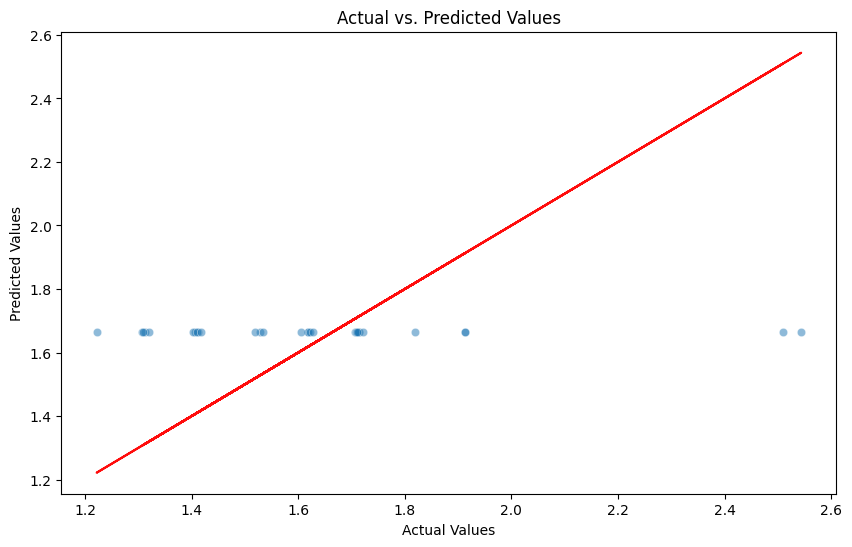

In [69]:
# Graph predicted vs. actual results (check whether for linear or ridge regression)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_y, y=predicted, alpha=.5) # alpha represents transparancy
plt.plot(test_y, test_y, color='#FF0C0C', linestyle='-', label='y=x') # Overlay y=x line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [131]:
# Create testing data for number of qubits vs. variance of gradients fitting
testing_df = pd.DataFrame({'N' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                           'Variance of Gradients' : [501, 250, 139, 72, 35, 17, 8, 5, 2, 1]})

In [132]:
def func(x, a, b, c):
    return a * 1 / (b ** x) + c # a * np.exp(-b * x) + c

b value: 0.660


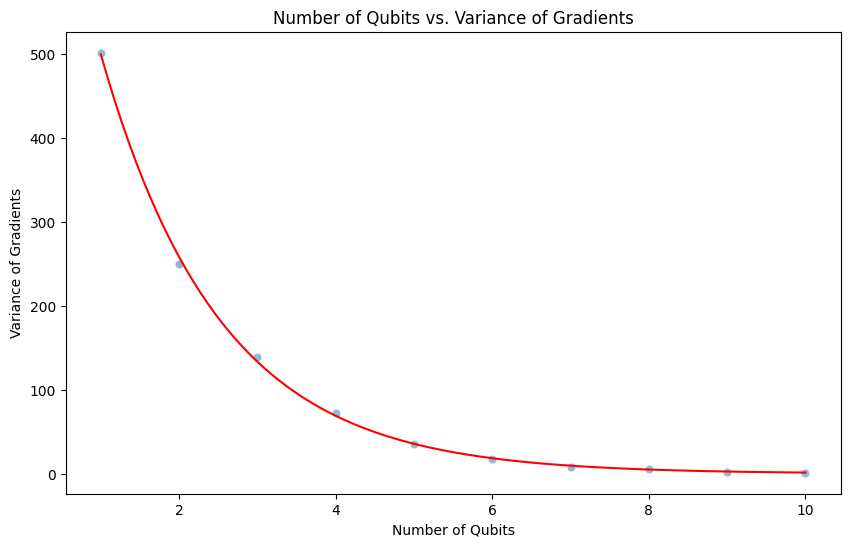

In [135]:
# Graph predicted vs. actual results (check whether for linear or ridge regression)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=testing_df['N'], y=testing_df['Variance of Gradients'], alpha=.5) # alpha represents transparancy

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, testing_df['N'], testing_df['Variance of Gradients'])
print("b value: {:.3f}".format(popt[1]))
x_smooth = np.linspace(testing_df['N'].min(), testing_df['N'].max(), 100)
plt.plot(x_smooth, func(x_smooth, *popt), 'r-', label='Fitted Curve')

plt.title('Number of Qubits vs. Variance of Gradients')
plt.xlabel('Number of Qubits')
plt.ylabel('Variance of Gradients')
plt.show()